<a href="https://colab.research.google.com/github/VydehiParavada/Generative-AI-projects/blob/main/FirstNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
EPOCHS_20 = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
VALIDATION_SPLIT = 0.2

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

train_images= train_images.reshape(60000, 784)

test_images= test_images.reshape(10000, 784)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')



In [ ]:
train_images /= 255
test_images /=255

print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
train_labels = keras.utils.to_categorical(train_labels, NB_CLASSES)
test_labels = keras.utils.to_categorical(test_labels, NB_CLASSES)


In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
train_labels[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test_labels.shape

(10000, 10)

In [ ]:
test_labels[14]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(784, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='SGD',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels,
          batch_size=BATCH_SIZE, epochs = EPOCHS_20,
          verbose = VERBOSE, validation_split= VALIDATION_SPLIT)

print(model.summary())

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3144 - loss: 1.9868 - val_accuracy: 0.7634 - val_loss: 1.0099
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7752 - loss: 0.8997 - val_accuracy: 0.8452 - val_loss: 0.6007
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8447 - loss: 0.5936 - val_accuracy: 0.8776 - val_loss: 0.4616
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8734 - loss: 0.4742 - val_accuracy: 0.8954 - val_loss: 0.3899
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8909 - loss: 0.4029 - val_accuracy: 0.9047 - val_loss: 0.3493
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9004 - loss: 0.3654 - val_accuracy: 0.9116 - val_loss: 0.3198
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9079 - loss: 0.3361 - val_accuracy: 0.9190 - val_loss: 0.2954
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9154 - loss: 0.3112 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (128, 784)                  │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (128, 10)                   │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (128, 10)                   │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,402 (2.38 MB)

 Trainable params: 623,400 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9445 - loss: 0.2028
Test accuracy: 0.9520999789237976


In [ ]:
test_digits = test_images[0:20]
predictions = model.predict(test_digits)
predictions[7]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([2.0347373e-04, 7.4116015e-03, 1.2328619e-03, 5.1400330e-02,
       3.5963479e-02, 1.0297878e-02, 1.0041959e-04, 2.3836400e-02,
       4.5137843e-03, 8.6503971e-01], dtype=float32)

In [ ]:
predictions[7].argmax()

9

In [ ]:
predictions[7][9]

0.8650397

In [ ]:
test_digits.shape

(20, 784)

In [ ]:
test_digits= test_digits.reshape(20,28,28)

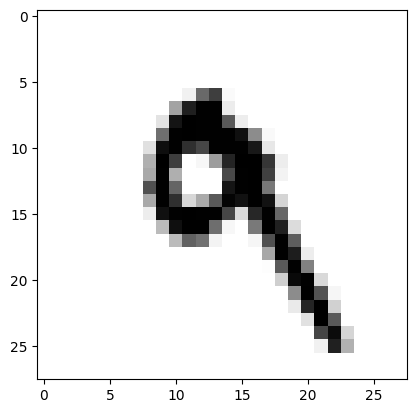

In [ ]:
import matplotlib.pyplot as plt
digit= test_digits[7]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()